In [6]:
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'../data/stanford-corenlp-full-2018-02-27', memory='8g',timeout=3000)

In [20]:
from nltk import Tree
import nltk
from functools import reduce

def binarize(tree):
    """
    Recursively turn a tree into a binary tree.
    """
    if isinstance(tree, str):
        return tree
    elif len(tree) == 1:
        return binarize(tree[0])
    else:
        label = tree.label()
        return reduce(lambda x, y: Tree(label, (binarize(x), binarize(y))), tree)

In [52]:
sentence = "To be completely fair, the only redeeming factor was the food which was above average but couldn't make up for all the other deficiencies of Teodora "

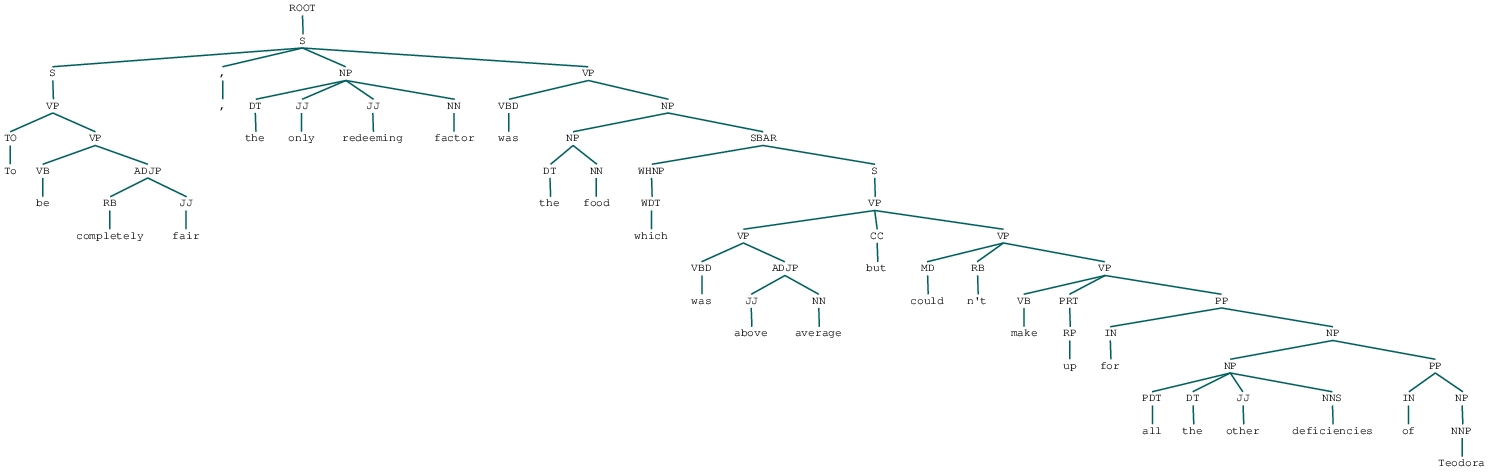

In [54]:
parse_tree = nlp.parse(sentence)
nltk_tree = Tree.fromstring(parse_tree)
nltk_tree

In [48]:
parse_tree = re.sub('\n', '', parse_tree)

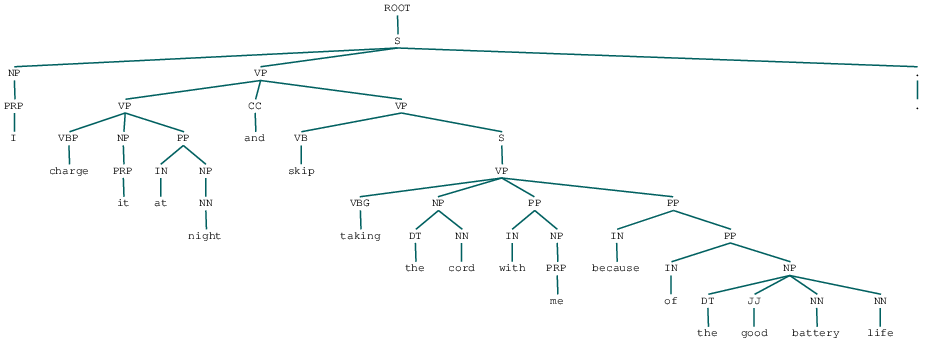

In [51]:
nltk_tree = Tree.fromstring(parse_tree)
nltk_tree

In [50]:
nlp.dependency_parse(sentence)

[('ROOT', 0, 2),
 ('nsubj', 2, 1),
 ('dobj', 2, 3),
 ('case', 5, 4),
 ('nmod', 2, 5),
 ('cc', 2, 6),
 ('conj', 2, 7),
 ('xcomp', 7, 8),
 ('det', 10, 9),
 ('dobj', 8, 10),
 ('case', 12, 11),
 ('nmod', 8, 12),
 ('case', 18, 13),
 ('mwe', 13, 14),
 ('det', 18, 15),
 ('amod', 18, 16),
 ('compound', 18, 17),
 ('nmod', 8, 18),
 ('punct', 2, 19)]

In [279]:
words = b_tree.leaves()
vocab = {w:i for i, w in enumerate(words)}

In [23]:
nodes = []
def traverse_tree(tree):
    nodes.append(tree.label())
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)
        else:
            print(subtree)

traverse_tree(b_tree)

I
Always
ask
the
bartender
for
the
SEASONAL
beer
!


In [24]:
nodes

['S', 'S', 'S', 'VP', 'NP', 'NP', 'PP', 'NP', 'NP']

In [19]:
trees = []
import re
with open('data/test_tree.txt', 'w') as f:
    for item in test_data:
        parse_tree = nlp.parse(item[4])
        nltk_tree = Tree.fromstring(parse_tree)
        b_tree = binarize(nltk_tree)
        line = str(b_tree)
        line = re.sub('\n', ' ', line)
        line = ' '.join(line.split())
        f.write(line+'||' + str(item[2])+'||'+' '.join(item[5])+'\n')

In [61]:
sent_vecs, mask_vecs, label_list, sent_lens, texts, targets = next(dg_train.get_ids_samples())

In [3]:
import en_core_web_sm
import spacy
spanlp = en_core_web_sm.load()

In [4]:
sentence = "The signs, the specials menus, food, and even all the waitstaff are ALL TOTALLY Japanese."

In [5]:
# document = spanlp(sentence)
# for item in document:
#     print('|||||||')
#     print(item)
#     print('****head')
#     print(item.head)
#     print('###child')
#     for child in item.children:
#         print(child)

In [5]:
# import networkx as nx
# document = spanlp(sentence)
# edges = []
# for token in document:
#     # FYI https://spacy.io/docs/api/token
#     for child in token.children:
#         edges.append(('{0}-{1}'.format(token.lower_,token.i),
#                     '{0}-{1}'.format(child.lower_,child.i)))

# # document = nlp.dependency_parse(sentence)
# # words = nlp.word_tokenize(sentence)
# for token in document:
#     # FYI https://spacy.io/docs/api/token
#     for child in token.children:
#         edges.append(('{0}-{1}'.format(token.lower_,token.i),
#                     '{0}-{1}'.format(child.lower_,child.i)))
# graph = nx.Graph(edges)

In [57]:
nx.shortest_path_length(graph, source='food-1', target='capable-9')

4

In [58]:
nx.shortest_path_length(graph, source='food-1', target='uniformly-3')

3

In [59]:
nx.shortest_path_length(graph, source='food-1', target='exceptional-4')

2

In [3]:
from data_reader_general import data_reader, data_generator
from backup.configs.config_crf_glove import config

In [4]:
dr = data_reader(config)
train_data = dr.load_data(config.train_path)
valid_data = dr.load_data(config.valid_path)
test_data = dr.load_data(config.test_path)
print("Training Samples: {}".format(len(train_data)))
print("Validating Samples: {}".format(len(valid_data)))
print("Testing Samples: {}".format(len(test_data)))

dg_train = data_generator(config, train_data)
dg_valid = data_generator(config, valid_data, False)
dg_test = data_generator(config, test_data, False)

Training Samples: 3001
Validating Samples: 601
Testing Samples: 1120


In [24]:
def get_dependency(text, targets):
    doc = spanlp(text)
    dependent_list = []
    for target in targets:
        #print(target)
        for token in doc:
        # FYI https://spacy.io/docs/api/token
            if token.text != target:
                continue
            
            dependent_list.append(token.head.text)
            dependent_list.append(token.text)
            for child in token.children:
                dependent_list.append(child.text)
    return dependent_list

In [25]:
sentence = "The food and the service are good."
dependent_list = get_dependency(sentence, ['food'])

In [26]:
dependent_list

['are', 'food', 'The', 'and', 'service']

In [7]:
# doc = spanlp("The food and the service are good.")

# for token in doc:
#     print('######')
#     print(token)
#     for child in token.children:
#         print(child.text,  child.dep_)

In [7]:
tags_all = []
for item in train_data:
    doc = spanlp(item[4])
    tags = [w.pos_ for w in doc]
    tags_all.extend(tags)

In [8]:
for item in valid_data:
    doc = spanlp(item[4])
    tags = [w.pos_ for w in doc]
    tags_all.extend(tags)

In [9]:
for item in test_data:
    doc = spanlp(item[4])
    tags = [w.pos_ for w in doc]
    tags_all.extend(tags)

In [10]:
len(tags_all)

92566

In [11]:
import numpy as np
tags_all_np = np.array(tags_all)

## Load Tree Data

In [33]:
train_file = 'data/parse_trees/res_train_trees.txt'
dev_file = 'data/parse_trees/res_dev_trees.txt'
test_file = 'data/parse_trees/res_test_trees.txt'

Training Samples: 3001
Validating Samples: 601
Testing Samples: 1120


In [55]:
trees = []
labels = []
targets = []
with open(train_file) as f:
    for line in f:
        item = line.split('|||')
        trees.append(item[0])
        targets.append(item[1])
        labels.append(item[3])


'(ROOT  (S    (S      (NP (EX There))      (VP (VBD was)        (NP          (NP (DT a) (JJ long) (NN wait))          (PP (IN for)            (NP (DT a) (NN table) (IN outside))))))    (, ,)    (CC but)    (S      (NP (PRP it))      (VP (VBD was)        (ADJP          (NP (DT a) (JJ little))          (RB too) (JJ hot))        (PP (IN in)          (NP (DT the) (NN sun)))        (SBAR          (ADVP (RB anyway))          (RB so)          (S            (NP (PRP$ our) (NN insde) (NN table))            (VP (VBD was)              (ADJP (RB very) (JJ nice)))))))    (. .)))'